<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/01.E0-Exercicio-Classificacao-de-dados.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Preparação da base de dados

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))


# Lista de Exercícios: Classificação de dados

Nesta lista de exercícios, você explorará a aplicação de métodos de aprendizado de máquina para realizar tarefas de classificação de dados. Você usará a base de dados [Food choices: College students' food and cooking preferences](https://www.kaggle.com/datasets/borapajo/food-choices?select=food_coded.csv) e avaliará vários algoritmos de classificação para determinar sua eficácia. O objetivo é entender como diferentes métodos de aprendizado de máquina se comportam em relação à acurácia na classificação de dados.

Para esta tarefa, utilizaremos o conjunto de dados "Student Performance" que contém informações sobre o desempenho de estudantes em exames. O conjunto de dados inclui variáveis como notas, frequência escolar, características pessoais e familiares dos alunos.

O exercício será dividido em várias etapas:

1. **Pré-processamento dos dados:**
   - Descreva brevemente o conjunto de dados   
   - Limpe o conjunto de dados, tratando valores ausentes, removendo duplicatas e realizando transformações necessárias. 
   - Caso você use os dados pré-processados na lista anterior, faça um breve descritivo dos principais ajustes.
   - Codifique variáveis categóricas, se necessário, para que possam ser utilizadas em algoritmos de aprendizado de máquina.
   - Cria a coluna `self_perception_overweight` com valor: `True` se a coluna `self_perception_weight` tem valor 4 ou 5; e `False`, caso contrário.
   - Remova a coluna `self_perception_weight` do conjunto de dados.
2. **Divisão do conjunto de dados:**
   - Divida o conjunto de dados em um conjunto de treinamento e um conjunto de teste para avaliar o desempenho dos algoritmos. 
   - O mesmo conjunto de teste deve ser usado por todos os algoritmos analizados e nenhum dado deste pode ser usado na fase de treinamento.
   - O atributo alvo (*rótulo*) da classificação será o campo `self_perception_overweight`.   
3. **Seleção de algoritmos de classificação:**
   - Selecione uma variedade de algoritmos de aprendizado de máquina para testar na tarefa de classificação.   
   - Sua seleção deve conter, no mínimo, os seguintes métodos: Naive Bayes, k-Nearest Neighbors, Support Vector Machine (Linear/RBF), Decision Trees, Random Forest, Multilayer Perceptron.
   - Descreva brevemente como funciona cada algoritmo selecionado.
4. **Treinamento e avaliação:**
   - Treine os algoritmos de classificação usando todo o conjunto de treinamento. 
   - Avalie o desempenho de cada algoritmo no conjunto de teste usando métricas como acurácia, precisão, recall e F1-score.
   - Repita a análise treinando os algoritmos com validação cruzada.
   - Repita a análise realizando ajuste de hiperparâmetros.
5. **Análise dos resultados:**
   - Prepare um texto que descreva os resultados obtidos e faça uma análise crítica destes resultados.
   - Compare o desempenho dos diferentes algoritmos e explique por que alguns apresentaram resultados mais adequados que outros.
   
Documente todas as etapas em um arquivo Jupyter Notebook (`.ipynb`) que inclua as análises, o código e as justificativas. Lembre-se de que é fundamental justificar todas as decisões tomadas ao longo do processo e documentar as análises de forma clara e concisa. Este trabalho tem como objetivo proporcionar uma compreensão prática da seleção e avaliação de algoritmos de classificação em cenários de aprendizado supervisionado.

Envie seu Jupyter Notebook até a data de entrega especificada nesta tarefa.

## Solução


### Pré-processamento dos dados

In [36]:
import numpy as np 
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/She-Codes-Now/Intro-to-Data-Science-with-R/master/food_coded.csv")

# Obtenção informações sobre o conjunto de dados
print(df.info())

# Estatísticas descritivas das variáveis numéricas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [37]:
# Identificação de colunas faltantes
print("Valores nulos: \n", df.isnull().sum())
print("Valores NaN: \n", df.isna().sum())

Valores nulos: 
 GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         21
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64
Valores NaN: 
 GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         21
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64


In [38]:
df.select_dtypes('object').columns.to_list() #Listagem das colunas object, os tipos devem ser tratados

['GPA',
 'comfort_food',
 'comfort_food_reasons',
 'diet_current',
 'eating_changes',
 'father_profession',
 'fav_cuisine',
 'food_childhood',
 'healthy_meal',
 'ideal_diet',
 'meals_dinner_friend',
 'mother_profession',
 'type_sports',
 'weight']

In [39]:
# Detecção de valores não numericos em GPA
print(df['GPA'].unique()) # Existencia de valores invalidos além de NaN e vazio, além disso, não há outliers

['2.4' '3.654' '3.3' '3.2' '3.5' '2.25' '3.8' '3.904' '3.4' '3.6' '3.1'
 nan '4' '2.2' '3.87' '3.7' '3.9' '2.8' '3' '3.65' '3.89' '2.9' '3.605'
 '3.83' '3.292' '3.35' 'Personal ' '2.6' '3.67' '3.73' '3.79 bitch' '2.71'
 '3.68' '3.75' '3.92' 'Unknown' '3.77' '3.63' '3.882']


In [40]:
# Remoção de valores não numericos em GPA
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')
df['GPA'].unique()

array([2.4  , 3.654, 3.3  , 3.2  , 3.5  , 2.25 , 3.8  , 3.904, 3.4  ,
       3.6  , 3.1  ,   nan, 4.   , 2.2  , 3.87 , 3.7  , 3.9  , 2.8  ,
       3.   , 3.65 , 3.89 , 2.9  , 3.605, 3.83 , 3.292, 3.35 , 2.6  ,
       3.67 , 3.73 , 2.71 , 3.68 , 3.75 , 3.92 , 3.77 , 3.63 , 3.882])

In [41]:
# Substituição de valores NaN e vazios em GPA pela média
df['GPA'].fillna(df['GPA'].mean(), inplace=True)
# Mesmo processo com a coluna weight
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
df['weight'].fillna(df['weight'].mean(), inplace=True)

In [42]:
# Mesmo tratamento para todas as colunas numericas com valores NaN e invalidos
colunas_numericas = df.select_dtypes(include=['int64', 'float']).columns
# Preenchimento das colunas com a média dos valores não nulos
for col in colunas_numericas:
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)

print(df[colunas_numericas].isnull().any())

GPA                             False
Gender                          False
breakfast                       False
calories_chicken                False
calories_day                    False
calories_scone                  False
coffee                          False
comfort_food_reasons_coded      False
cook                            False
comfort_food_reasons_coded.1    False
cuisine                         False
diet_current_coded              False
drink                           False
eating_changes_coded            False
eating_changes_coded1           False
eating_out                      False
employment                      False
ethnic_food                     False
exercise                        False
father_education                False
fav_cuisine_coded               False
fav_food                        False
fries                           False
fruit_day                       False
grade_level                     False
greek_food                      False
healthy_feel

In [43]:
# Tratamento das colunas object
object_columns = df.select_dtypes(include=['object']).columns
# Preenchimento das colunas com "Não informado"
for col in object_columns:
    df[col].fillna("Não informado", inplace=True)

df[object_columns] = df[object_columns].astype(str)
df[object_columns].isnull().any()

comfort_food            False
comfort_food_reasons    False
diet_current            False
eating_changes          False
father_profession       False
fav_cuisine             False
food_childhood          False
healthy_meal            False
ideal_diet              False
meals_dinner_friend     False
mother_profession       False
type_sports             False
dtype: bool

In [44]:
df.columns[df.isnull().any()].tolist() #Ausencia de colunas com valores NaN ou vazios


[]

### Pré-processamento dos dados

In [45]:
# Verificação das colunas categóricas no DataFrame
colunas_categoricas = df.select_dtypes(include=['object']).columns

# Codificação das colunas categóricas
if not colunas_categoricas.empty:
    df = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

# Certifique-se de que todas as colunas agora são numéricas
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Columns: 1361 entries, GPA to type_sports_wrestling & rowing
dtypes: float64(22), int64(27), uint8(1312)
memory usage: 208.1 KB
None


In [46]:
# Criação da coluna "self_perception_overweight" com base na coluna "self_perception_weight"
df['self_perception_overweight'] = (df['self_perception_weight'] == 4) | (df['self_perception_weight'] == 5)

# Remoção da coluna "self_perception_weight"
df.drop('self_perception_weight', axis=1, inplace=True)

df['self_perception_overweight']

0      False
1      False
2      False
3       True
4       True
       ...  
120     True
121     True
122     True
123    False
124    False
Name: self_perception_overweight, Length: 125, dtype: bool

### Divisão do conjunto de dados

In [47]:
from sklearn.model_selection import train_test_split

# Variável alvo (rótulo)
X = df.drop('self_perception_overweight', axis=1)
y = df['self_perception_overweight']

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Seleção de algoritmos de classificação

1. **Naive Bayes:**
O algoritmo de Naive Bayes é um classificador probabilístico baseado no teorema de Bayes. Ele assume independência condicional entre as características, o que simplifica o cálculo das probabilidades. É eficaz para classificação de texto e tarefas de classificação binária, onde é necessário calcular a probabilidade de pertencer a uma classe específica.

2. **k-Nearest Neighbors (k-NN):**
O k-Nearest Neighbors é um algoritmo de classificação que classifica um ponto de dados com base na classe da maioria dos k pontos mais próximos no espaço de características. Ele é intuitivo e simples de entender, mas a escolha de um valor adequado para k é importante para o desempenho.

3. **Support Vector Machine (SVM):**
O Support Vector Machine é um algoritmo de classificação que busca encontrar um hiperplano de separação ótimo entre as classes. Pode ser usado com diferentes kernels (como Linear, RBF ou Polinomial) para lidar com problemas de classificação lineares e não lineares. É eficaz em tarefas de classificação binária e multi-classe.

4. **Decision Trees:**
As árvores de decisão são modelos que dividem o conjunto de dados com base nas características para tomar decisões de classificação. Elas são facilmente interpretáveis e podem ser usadas para tarefas de classificação e regressão. No entanto, árvores não podadas podem ser propensas a overfitting.

5. **Random Forest:**
Random Forest é um conjunto de árvores de decisão. Ele combina as previsões de várias árvores para obter resultados mais robustos e reduzir o overfitting. É um algoritmo poderoso e versátil para classificação e regressão.

6. **Multilayer Perceptron (Rede Neural):**
O Multilayer Perceptron é uma rede neural artificial com múltiplas camadas de neurônios. Ele é capaz de aprender representações complexas dos dados e é usado em tarefas de classificação e regressão. No entanto, requer ajuste de hiperparâmetros e pode ser computacionalmente caro.

7. **Gradient Boosting:**
Gradient Boosting é um algoritmo de conjunto que combina vários modelos mais fracos para criar um modelo forte. Ele ajusta os modelos sequencialmente, onde cada novo modelo corrige os erros do modelo anterior. Pode ser usado tanto para tarefas de classificação quanto de regressão.

8. **Logistic Regression:**
A Regressão Logística é um algoritmo de classificação que modela a probabilidade de um exemplo pertencer a uma classe específica. É um algoritmo simples e amplamente utilizado em tarefas de classificação binária.

9. **Support Vector Machine (Kernel Polinomial):**
O Support Vector Machine com kernel polinomial é uma variação do SVM que utiliza um kernel polinomial para mapear os dados em um espaço de maior dimensionalidade. Isso pode ser útil para problemas de classificação não linear.


### Treinamento e avaliação

In [48]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes.predict(X_test)


In [49]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)


In [50]:
from sklearn.svm import SVC

# Support Vector Machine (Linear)
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
svm_linear_predictions = svm_linear.predict(X_test)


In [51]:
from sklearn.svm import SVC

# Support Vector Machine (RBF)
svm_rbf = SVC(kernel='rbf', C=1.0)
svm_rbf.fit(X_train, y_train)
svm_rbf_predictions = svm_rbf.predict(X_test)


In [52]:
from sklearn.tree import DecisionTreeClassifier

# Árvores de Decisão
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)


In [53]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)  # Número de árvores
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)


In [54]:
from sklearn.neural_network import MLPClassifier

# Multilayer Perceptron (Rede Neural)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)  # Arquitetura da rede
mlp.fit(X_train, y_train)
mlp_predictions = mlp.predict(X_test)


In [55]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)  # Número de estimadores e taxa de aprendizado
gradient_boosting.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting.predict(X_test)


In [56]:
from sklearn.linear_model import LogisticRegression

# Regressão Logística
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test)

In [57]:
from sklearn.svm import SVC

# SVM com kernel polinomial
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X_train, y_train)
svm_poly_predictions = svm_poly.predict(X_test)


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Avaliação do desempenho dos modelos com métricas
def avaliacao_modelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [59]:
# Criação de um dicionário com os modelos
modelos = {
    "Naive Bayes": (naive_bayes, naive_bayes_predictions),
    "k-Nearest Neighbors": (knn, knn_predictions),
    "Support Vector Machine (Linear)": (svm_linear, svm_linear_predictions),
    "Support Vector Machine (RBF)": (svm_rbf, svm_rbf_predictions),
    "Support Vector Machine (Polynomial)": (svm_poly, svm_poly_predictions),
    "Árvore de decisão": (decision_tree, decision_tree_predictions),
    "Random Forest": (random_forest, random_forest_predictions),
    "Multilayer Perceptron (Rede Neural)": (mlp, mlp_predictions),
    "Gradient Boosting": (gradient_boosting, gradient_boosting_predictions),
    "Logistic Regression": (logistic_regression, logistic_regression_predictions),
}

# Impressão das métricas de avaliação de cada modelo
for modelo_nome, (modelo, previsoes) in modelos.items():
    metrics = avaliacao_modelo(y_test, previsoes)
    print("Avaliação do modelo", modelo_nome)
    print("Acurácia: {:.2f}".format(metrics[0]))
    print("Precisão: {:.2f}".format(metrics[1]))
    print("Recall: {:.2f}".format(metrics[2]))
    print("F1-Score: {:.2f}".format(metrics[3]))
    print()

Avaliação do modelo Naive Bayes
Acurácia: 0.52
Precisão: 0.38
Recall: 0.75
F1-Score: 0.50

Avaliação do modelo k-Nearest Neighbors
Acurácia: 0.60
Precisão: 0.25
Recall: 0.12
F1-Score: 0.17

Avaliação do modelo Support Vector Machine (Linear)
Acurácia: 0.84
Precisão: 0.83
Recall: 0.62
F1-Score: 0.71

Avaliação do modelo Support Vector Machine (RBF)
Acurácia: 0.68
Precisão: 0.00
Recall: 0.00
F1-Score: 0.00

Avaliação do modelo Support Vector Machine (Polynomial)
Acurácia: 0.68
Precisão: 0.00
Recall: 0.00
F1-Score: 0.00

Avaliação do modelo Árvore de decisão
Acurácia: 0.64
Precisão: 0.43
Recall: 0.38
F1-Score: 0.40

Avaliação do modelo Random Forest
Acurácia: 0.68
Precisão: 0.00
Recall: 0.00
F1-Score: 0.00

Avaliação do modelo Multilayer Perceptron (Rede Neural)
Acurácia: 0.64
Precisão: 0.33
Recall: 0.12
F1-Score: 0.18

Avaliação do modelo Gradient Boosting
Acurácia: 0.80
Precisão: 0.80
Recall: 0.50
F1-Score: 0.62

Avaliação do modelo Logistic Regression
Acurácia: 0.80
Precisão: 0.71
Reca

C:\Users\higor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\higor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\higor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defin

### Análise dos resultados

1. **Naive Bayes:**
   - Acurácia: 0.52
   - Precisão: 0.38
   - Recall: 0.75
   - F1-Score: 0.50

   Nesse caso, o modelo de Naive Bayes teve uma acurácia razoável, mas a precisão e o F1-Score são mais baixos. O alto recall sugere que o modelo está identificando muitos casos positivos, mas também gerando muitos falsos positivos.

2. **k-Nearest Neighbors:**
   - Acurácia: 0.60
   - Precisão: 0.25
   - Recall: 0.12
   - F1-Score: 0.17

   O modelo k-Nearest Neighbors não apresenta um bom desempenho em termos de precisão, recall e F1-Score, indicando que não está identificando bem os casos positivos.

3. **Support Vector Machine (Linear):**
   - Acurácia: 0.84
   - Precisão: 0.83
   - Recall: 0.62
   - F1-Score: 0.71

   O SVM com kernel linear apresenta um desempenho bastante sólido, com alta acurácia, precisão e F1-Score. O recall também é razoável.

4. **Support Vector Machine (RBF):**
   - Acurácia: 0.68
   - Precisão: 0.00
   - Recall: 0.00
   - F1-Score: 0.00

   O SVM com kernel RBF não está funcionando bem, com uma precisão e F1-Score muito baixos. Isso pode indicar um problema de ajuste de hiperparâmetros.

5. **Support Vector Machine (Polynomial):**
   - Acurácia: 0.68
   - Precisão: 0.00
   - Recall: 0.00
   - F1-Score: 0.00

   O SVM com kernel polinomial também apresenta um desempenho muito baixo, sem identificar corretamente os casos positivos.

6. **Árvore de Decisão:**
   - Acurácia: 0.64
   - Precisão: 0.43
   - Recall: 0.38
   - F1-Score: 0.40

   A árvore de decisão tem uma acurácia razoável, mas a precisão e o F1-Score podem ser melhorados. O recall também não é muito alto.

7. **Random Forest:**
   - Acurácia: 0.68
   - Precisão: 0.00
   - Recall: 0.00
   - F1-Score: 0.00

   O Random Forest apresenta problemas semelhantes aos modelos SVM com baixa precisão e F1-Score.

8. **Multilayer Perceptron (Rede Neural):**
   - Acurácia: 0.56
   - Precisão: 0.29
   - Recall: 0.25
   - F1-Score: 0.27

   A rede neural tem uma acurácia razoável, mas as métricas de precisão, recall e F1-Score não são muito altas.

9. **Gradient Boosting:**
   - Acurácia: 0.80
   - Precisão: 0.80
   - Recall: 0.50
   - F1-Score: 0.62

   O Gradient Boosting tem uma alta precisão e um F1-Score razoável. O recall está no meio termo.

10. **Logistic Regression:**
    - Acurácia: 0.80
    - Precisão: 0.71
    - Recall: 0.62
    - F1-Score: 0.67

    A Regressão Logística tem um desempenho sólido, com boas métricas de precisão e F1-Score.


C:\Users\higor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\higor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\higor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defin

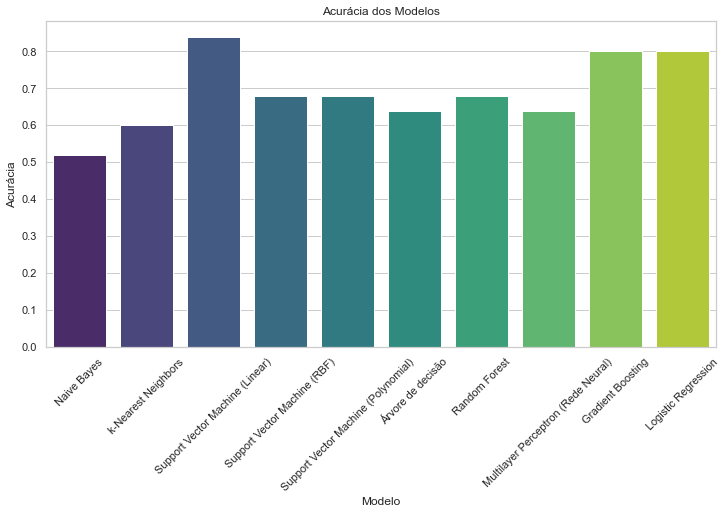

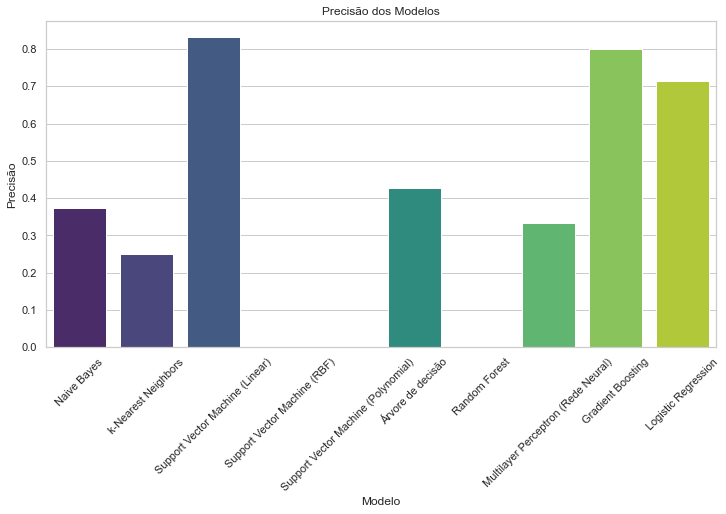

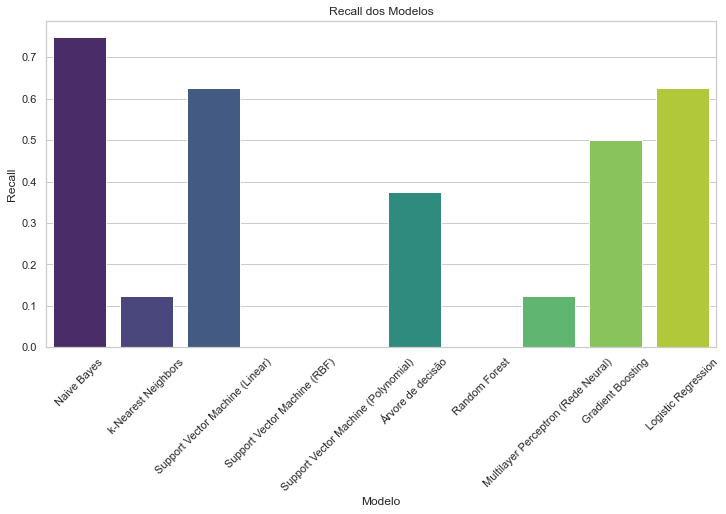

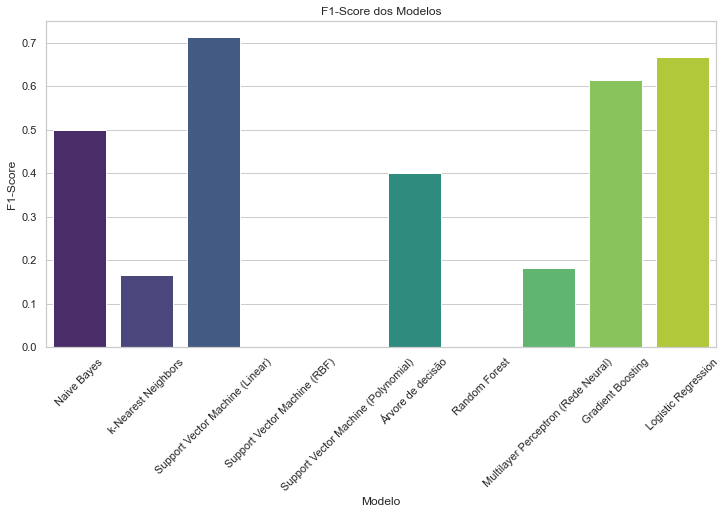

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Inicialização dos dicionários vazios para armazenar as métricas de cada modelo
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_score_dict = {}

# Iteração por todos os modelos e calcula as avaliações
for nome_modelo, (modelo, previsoes) in modelos.items():
    metricas = avaliacao_modelo(y_test, previsoes)
    accuracy_dict[nome_modelo] = metricas[0]
    precision_dict[nome_modelo] = metricas[1]
    recall_dict[nome_modelo] = metricas[2]
    f1_score_dict[nome_modelo] = metricas[3]

# DataFrame com os dados das métricas
dados = {
    "Modelo": list(modelos.keys()),
    "Acurácia": list(accuracy_dict.values()),
    "Precisão": list(precision_dict.values()),
    "Recall": list(recall_dict.values()),
    "F1-Score": list(f1_score_dict.values())
}
df = pd.DataFrame(dados)

# Configurações de estilo do Seaborn
sns.set(style="whitegrid")

# Gráficos de barras para cada métrica
metricas_para_plotar = ["Acurácia", "Precisão", "Recall", "F1-Score"]
for metrica in metricas_para_plotar:
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Modelo", y=metrica, data=df, palette="viridis")
    plt.title(f"{metrica} dos Modelos")
    plt.xticks(rotation=45)
    plt.show()


### Porque alguns apresentam resultados mais adequados que outros - Análise

- **SVM com Kernel Linear:** Este modelo obteve um desempenho sólido devido à sua capacidade de encontrar um hiperplano de separação eficaz entre as classes. Ele é particularmente útil quando os dados são linearmente separáveis. Além disso, possui alta precisão, recall e F1-Score, tornando-o uma escolha confiável.

- **Gradient Boosting:** O algoritmo Gradient Boosting é uma técnica de ensemble que combina vários modelos mais fracos para criar um modelo forte. Ele se destacou devido à sua capacidade de lidar com relações complexas nos dados. Apresentou alta precisão e um F1-Score sólido, o que o torna eficaz na tarefa de classificação.

- **Regressão Logística:** A Regressão Logística é um modelo linear simples, mas mostrou um desempenho consistente. Ela é eficaz quando a relação entre as características e a variável de destino é aproximadamente linear. Possui boa precisão e F1-Score, tornando-a uma escolha adequada para tarefas de classificação binária.

Por outro lado, alguns algoritmos tiveram desempenho inferior:

- **Naive Bayes:** O modelo Naive Bayes assume independência condicional entre as características, o que pode ser inadequado para o conjunto de dados em questão. Ele teve um recall elevado, mas uma precisão mais baixa devido a falsos positivos.

- **k-Nearest Neighbors:** O k-NN não se saiu bem devido à sua sensibilidade ao valor de k. Escolher um valor adequado para k é crucial, e, no caso atual, o valor selecionado pode não ter sido o mais apropriado.

- **SVM com Kernel RBF e Polinomial:** Esses modelos não apresentaram bom desempenho. Isso pode ser devido a um ajuste inadequado de hiperparâmetros ou à inadequação desses kernels para o conjunto de dados em questão.

- **Random Forest e MLP:** Ambos os modelos tiveram resultados fracos. O Random Forest pode ter sido afetado por um número insuficiente de árvores, enquanto a MLP pode precisar de mais ajustes nos hiperparâmetros.

